In [8]:
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wellpathpy as wpp
import xarray as xr
from segysak import __version__
import glob
from segysak.segy import (
    segy_loader,
    get_segy_texthead,
    segy_header_scan,
    segy_header_scrape,
    well_known_byte_locs,
)

In [2]:
path = r"C:\Users\Alina\Desktop\linesutm.txt"

In [3]:
df = pd.read_csv(path, sep=";", header=None, names=["LineNo", "E", "N", "Z"])
df

,LineNo,E,N,Z
0,1,540352.627,7677057.886,-0.563
1,1,540353.648,7678924.260,-0.563
2,2,540552.994,7676665.760,-0.563
3,2,540553.833,7678924.988,-0.563
4,3,540752.810,7676664.106,-0.563
5,3,540753.581,7678654.954,-0.563
6,4,540954.272,7676657.317,-0.563
7,4,540954.504,7678660.449,-0.563
8,5,541150.061,7676661.167,-0.563
9,5,541149.555,7678659.532,-0.563


In [4]:
lines = []

for i in range(len(df["LineNo"].unique())):
    buff = df[df["LineNo"]==i+1]
    line = (
        buff["E"].values,
        buff["N"].values
    )
    lines.append(line)
    

In [5]:

names = ['arbitary line 1',
'arbitary line 2',
'arbitary line 3',
'arbitary line 4',
'arbitary line 5',
'arbitary line 6',
'arbitary line 7',
'arbitary line 8',
'arbitary line 9',
'arbitary line 10',
'arbitary line 11',
'arbitary line 12',
'arbitary line 13',
'arbitary line 14',
'arbitary line 15',
'arbitary line 16']

cubes = glob.glob(r"C:\Users\Alina\Desktop\sgy\sgy\depth*.sgy")
cubes

['C:\\Users\\Alina\\Desktop\\sgy\\sgy\\depth_ant_tracking.sgy',
 'C:\\Users\\Alina\\Desktop\\sgy\\sgy\\depth_coherency.sgy',
 'C:\\Users\\Alina\\Desktop\\sgy\\sgy\\depth_cosin_instantaneous_phase.sgy',
 'C:\\Users\\Alina\\Desktop\\sgy\\sgy\\depth_relative_acoustic_impedance.sgy',
 'C:\\Users\\Alina\\Desktop\\sgy\\sgy\\depth_stack_astack_soft_bin25.sgy']

In [14]:
for cube in cubes:
    for name, line in zip(names, lines):
        # print(cube, line)
        volve_3d = segy_loader(cube, **well_known_byte_locs("petrel_3d"))
        line_A = volve_3d.seis.interp_line(line[0], line[1], bin_spacing_hint=10)
        line_A_data = line_A.to_array().squeeze().T
        n_samples, n_traces = line_A_data.shape
        x_coords = line_A.cdp_x
        y_coords = line_A.cdp_y
        twt = line_A.twt
        CDP = line_A.cdp
        
        X = np.repeat(x_coords, n_samples) 
        Y = np.repeat(y_coords, n_samples) 
        Z = np.tile(twt, n_traces) 
        CDP = np.repeat(CDP, n_samples) 
        
        Amplitude = line_A_data.to_numpy().reshape(-1)
        
        
        df = pd.DataFrame({
            'X': X,
            'Y': Y,
            'Z': Z,
            'Amplitude': Amplitude,
            'CDP': CDP
        })
        
        df.dropna(subset=['X', 'Y'], inplace=True)
        df.fillna(0, inplace=True)
        
        prefix = cube.split('depth_')[-1][:-4]
        # print(df.head())
        # df.sort_values(by = ['X', 'Z'], inplace = True)
        df.to_csv(f'C:\\Users\\Alina\\Desktop\\{prefix}_{name}.csv', index=False)


  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

  0%|          | 0.00/11.9k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/11.9k [00:00<?, ? traces/s]

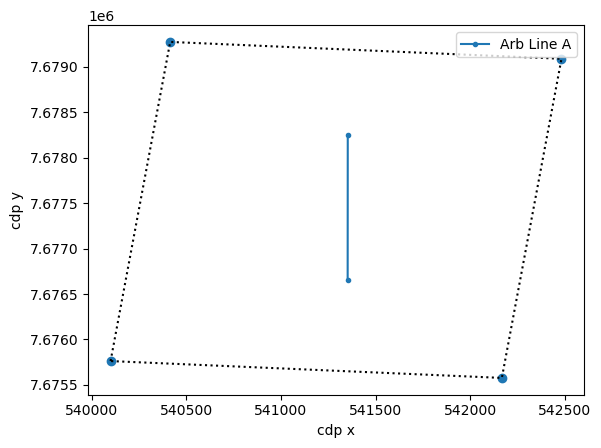

In [103]:
ax = volve_3d.seis.plot_bounds()
ax.plot(arb_line_A[0], arb_line_A[1], ".-", label="Arb Line A")
# ax.plot(arb_line_B[0], arb_line_B[1], ".-", label="Arb Line B")
ax.legend()

In [104]:
from time import time

tic = time()
line_A = volve_3d.seis.interp_line(arb_line_A[0], arb_line_A[1], bin_spacing_hint=10)
toc = time()
print(f"That took {toc-tic} seconds")

That took 0.27717041969299316 seconds


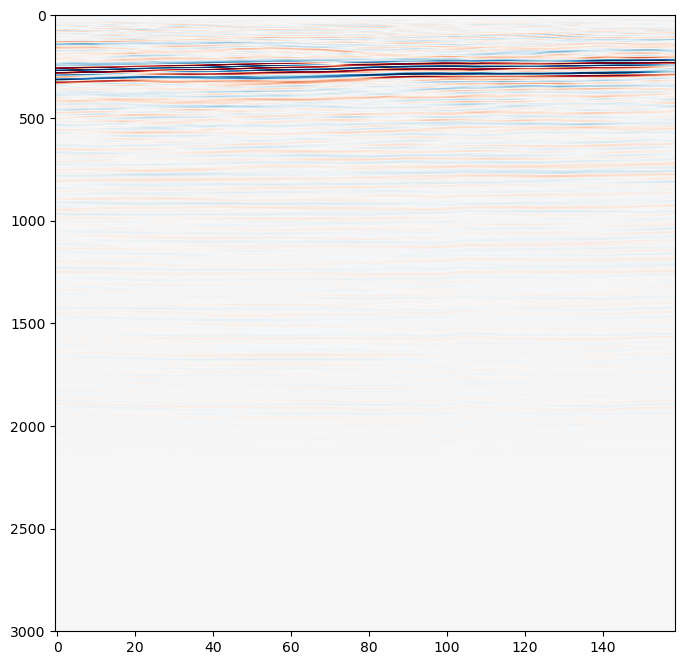

In [105]:
plt.figure(figsize=(8, 8))
plt.imshow(line_A.to_array().squeeze().T, aspect="auto", cmap="RdBu", vmin=-10, vmax=10)

In [106]:
line_A.to_array().squeeze().T.shape


(3001, 159)

In [107]:
line_A


<xarray.Dataset>
Dimensions:  (twt: 3001, cdp: 159)
Coordinates:
  * twt      (twt) float64 0.0 3.407 6.814 ... 1.021e+04 1.022e+04 1.022e+04
    cdp_x    (cdp) float64 5.414e+05 5.414e+05 5.414e+05 ... 5.414e+05 5.414e+05
    cdp_y    (cdp) float64 7.677e+06 7.677e+06 7.677e+06 ... 7.678e+06 7.678e+06
    iline    (cdp) float64 47.69 47.65 47.61 47.58 ... 42.12 42.08 42.04 42.01
    xline    (cdp) float64 41.19 41.59 41.99 42.39 ... 103.5 103.9 104.3 104.7
  * cdp      (cdp) int32 0 1 2 3 4 5 6 7 8 ... 151 152 153 154 155 156 157 158
Data variables:
    data     (cdp, twt) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         3.407
    text:                C 1 SEGY OUTPUT FROM Petrel 2017.4 Wednesday, Februa...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    ((540099.5, 7675762.5), (540414.56, 7679274.5), (542...
    source_file:         depth_stack_astack_soft_bin25
    srd:                 None
    datatype:            None
    percentiles:         [-0.4545141730853375, -0.4274036306998183, -0.059976...
    coord_scalar:        -100.0

In [108]:
line_A_data.shape

(3001, 186)

In [109]:
import numpy as np
import pandas as pd


line_A_data = line_A.to_array().squeeze().T
n_samples, n_traces = line_A_data.shape
x_coords = line_A.cdp_x
y_coords = line_A.cdp_y
twt = line_A.twt
CDP = line_A.cdp

X = np.repeat(x_coords, n_samples) 
Y = np.repeat(y_coords, n_samples) 
Z = np.tile(twt, n_traces) 
CDP = np.repeat(CDP, n_samples) 

Amplitude = line_A_data.to_numpy().reshape(-1)


df = pd.DataFrame({
    'X': X,
    'Y': Y,
    'Z': Z,
    'Amplitude': Amplitude,
    'CDP': CDP
})

df.dropna(subset=['X', 'Y'], inplace=True)
df.fillna(0, inplace=True)


print(df.head())
# df.sort_values(by = ['X', 'Z'], inplace = True)
f"{x}_{y}.sgy"
df.to_csv(f'C:\\Users\\Alina\\Desktop\\{prefix}_{name}.csv', index=False)


               X             Y       Z  Amplitude  CDP
0  541352.290011  7.676659e+06   0.000        0.0    0
1  541352.290011  7.676659e+06   3.407        0.0    0
2  541352.290011  7.676659e+06   6.814        0.0    0
3  541352.290011  7.676659e+06  10.221        0.0    0
4  541352.290011  7.676659e+06  13.628        0.0    0


In [12]:
prefix = cube.split('depth_')[-1][:-4]


'ant_tracking'

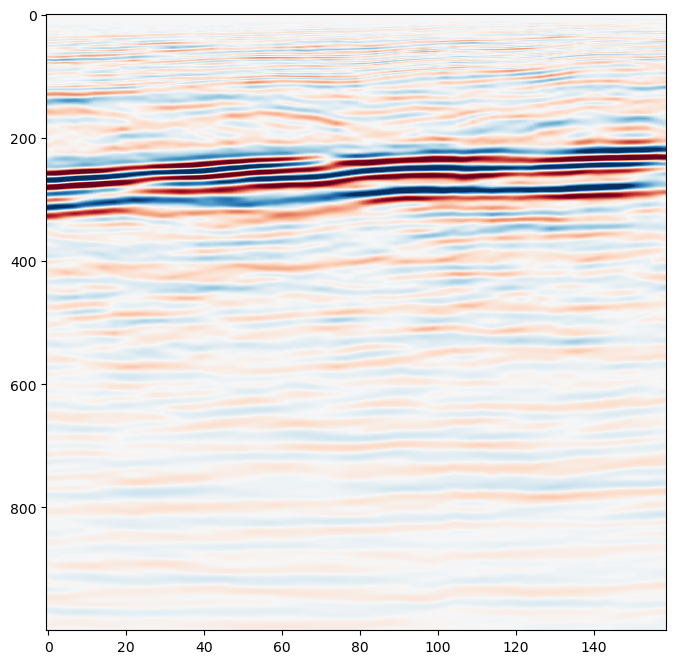

In [114]:
x = df["X"].values
y = df["Y"].values
z = df["Z"].values
CDP = df["CDP"].values
a = df["Amplitude"].values
xx = np.reshape(x, (np.unique(z).size, np.unique(y).size))
yy = np.reshape(y, (np.unique(z).size, np.unique(y).size))
zz = np.reshape(z, (np.unique(z).size, np.unique(y).size))
aa = np.reshape(a, (np.unique(z).size, np.unique(y).size))
cdp = np.reshape(CDP, (np.unique(z).size, np.unique(y).size))
plt.figure(figsize=(8, 8))
plt.imshow(aa[0:1000,:], vmin=-10, vmax=10, cmap='RdBu')
plt.gca().set_aspect("auto")

In [48]:
n_samples, n_traces


(3001, 186)

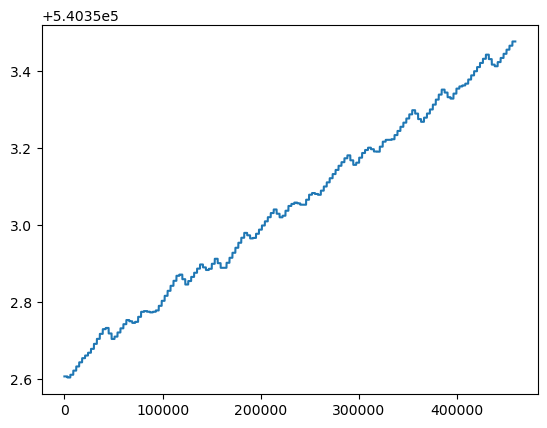

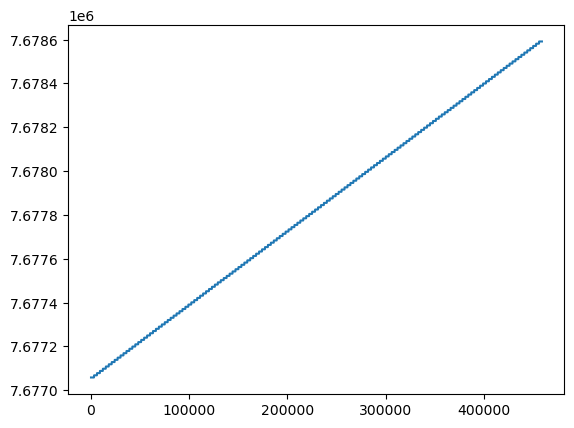

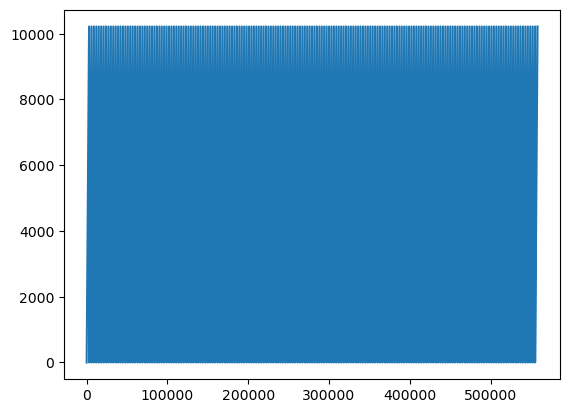

In [46]:
import numpy as np
from matplotlib import pyplot as plt

z = np.tile(line_A.twt.to_numpy(), line_A.to_array().squeeze().T.shape[1])
x = np.repeat(line_A.cdp_x.to_numpy(), line_A.to_array().squeeze().T.shape[0])
y = np.repeat(line_A.cdp_y.to_numpy(), line_A.to_array().squeeze().T.shape[0])
plt.plot(x)
plt.show()

plt.plot(y)
plt.show()

plt.plot(z)
plt.show()